In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
heartdata = pd.read_csv('selected_heartdata.csv')
heartdata.head()

,HeartDisease,GenHealth,Stroke,DiffWalking,AgeCategory,PhysicalHealth
0,0,3,0,0,5,3.0
1,0,3,1,0,0,0.0
2,0,2,0,0,1,0.0
3,0,1,0,0,0,0.0
4,0,2,0,1,3,0.0


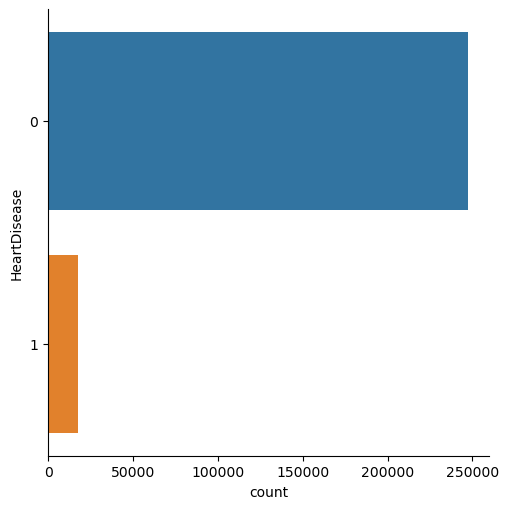

In [3]:
sb.catplot(y = "HeartDisease", data = heartdata, kind = "count")

In [4]:
y = heartdata["HeartDisease"]
X = heartdata[["GenHealth","DiffWalking","Stroke","PhysicalHealth","AgeCategory"]]

In [5]:
def SVMClass(X_train, X_test, y_train, y_test, svm):
    
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))
    cmTest = confusion_matrix(y_test, y_pred)
    tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
    fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

    print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
    print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
    print()

    print("FPR Train :\t", (fpTest/(tnTest + fpTest)))
    print("FNR Train :\t", (fnTest/(tpTest + fnTest)))

    sb.heatmap(confusion_matrix(y_test, y_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18})
    
    print(classification_report(y_test, y_pred))
    return y_pred

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Accuracy of logistic regression classifier on test set: 0.93
TPR Train :	 0.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 1.0
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     74188
           1       0.00      0.00      0.00      5325

    accuracy                           0.93     79513
   macro avg       0.47      0.50      0.48     79513
weighted avg       0.87      0.93      0.90     79513



C:\Users\Raven\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raven\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raven\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


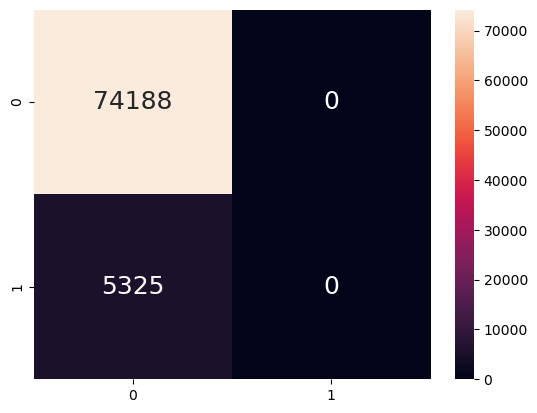

In [7]:
svm = SVC(kernel='linear', random_state=42)
y_pred = SVMClass(X_train, X_test, y_train, y_test,svm)

# Balanced Dataset 

In [8]:
balancedheartdata = pd.read_csv('balanced_heartdata.csv')

In [9]:
y_under = balancedheartdata["HeartDisease"]
X_under = balancedheartdata[["GenHealth","DiffWalking","Stroke","PhysicalHealth","AgeCategory"]]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

Accuracy of logistic regression classifier on test set: 0.74
TPR Train :	 0.8297219558964526
TNR Train :	 0.6501413760603204

FPR Train :	 0.34985862393967954
FNR Train :	 0.17027804410354747
              precision    recall  f1-score   support

           0       0.80      0.65      0.72      5305
           1       0.70      0.83      0.76      5215

    accuracy                           0.74     10520
   macro avg       0.75      0.74      0.74     10520
weighted avg       0.75      0.74      0.74     10520



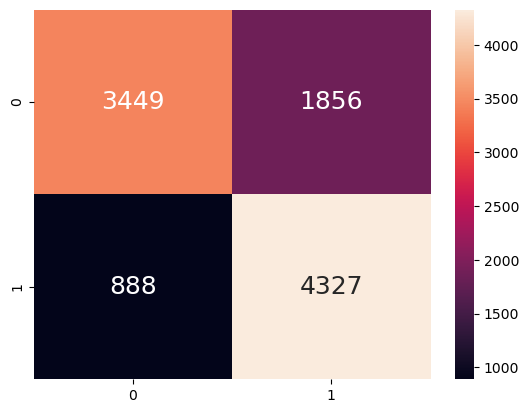

In [11]:
svm = SVC(kernel='linear', random_state=42)
y_pred_under = SVMClass(X_train, X_test, y_train, y_test,svm)

# Gridsearch to find optimal parameters

In [39]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
}

In [40]:
svm = SVC(random_state=42)

In [41]:
# Initialize GridSearchCV with the SVM model and parameters
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)
# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [42]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'kernel': 'rbf'}


Accuracy of logistic regression classifier on test set: 0.74
TPR Train :	 0.8157238734419943
TNR Train :	 0.663147973609802

FPR Train :	 0.3368520263901979
FNR Train :	 0.18427612655800577
              precision    recall  f1-score   support

           0       0.79      0.66      0.72      5305
           1       0.70      0.82      0.76      5215

    accuracy                           0.74     10520
   macro avg       0.74      0.74      0.74     10520
weighted avg       0.75      0.74      0.74     10520



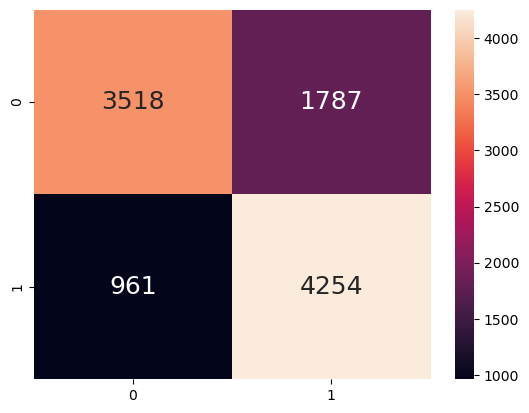

In [43]:
svm = SVC(C=1, kernel='rbf', random_state=42)
y_pred_under = SVMClass(X_train, X_test, y_train, y_test,svm)

## Gridsearch testing if gamma has any effect

In [27]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma':[0.0001, 0.001]
}


In [28]:
svm = SVC(random_state=42)

In [29]:
# Initialize GridSearchCV with the SVM model and parameters
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

In [30]:
# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.0001, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [31]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


Accuracy of logistic regression classifier on test set: 0.74
TPR Train :	 0.8151486097794822
TNR Train :	 0.6606974552309143

FPR Train :	 0.3393025447690858
FNR Train :	 0.18485139022051775
              precision    recall  f1-score   support

           0       0.78      0.66      0.72      5305
           1       0.70      0.82      0.75      5215

    accuracy                           0.74     10520
   macro avg       0.74      0.74      0.74     10520
weighted avg       0.74      0.74      0.74     10520



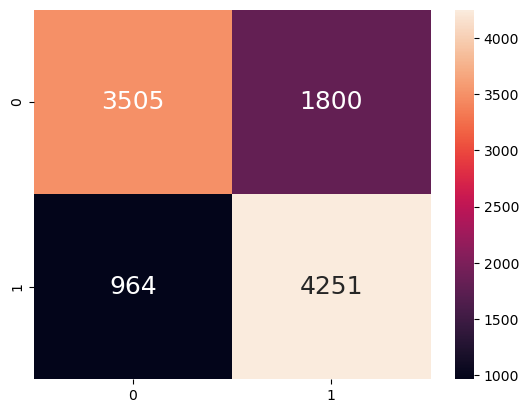

In [32]:
svm = SVC(C=100, kernel='rbf',gamma=0.001, random_state=42)
y_pred_under = SVMClass(X_train, X_test, y_train, y_test,svm)

Gamma has 0 to no effect compared to the base balanced dataset model in fact its False Negative Rate is higher which is bad

## Gridsearch fine tuning with "recall" scoring

In [33]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
}

In [34]:
svm = SVC(random_state=42)

In [35]:
# Initialize GridSearchCV with the SVM model and parameters
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='recall',n_jobs=-1)
# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='recall')

In [37]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 100, 'kernel': 'poly'}


Accuracy of logistic regression classifier on test set: 0.74
TPR Train :	 0.8669223394055608
TNR Train :	 0.6067860508953817

FPR Train :	 0.39321394910461827
FNR Train :	 0.13307766059443912
              precision    recall  f1-score   support

           0       0.82      0.61      0.70      5305
           1       0.68      0.87      0.76      5215

    accuracy                           0.74     10520
   macro avg       0.75      0.74      0.73     10520
weighted avg       0.75      0.74      0.73     10520



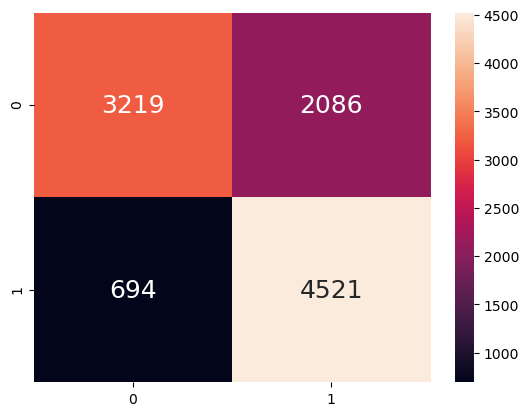

In [38]:
svm = SVC(C=100, kernel='poly', random_state=42)
y_pred_under = SVMClass(X_train, X_test, y_train, y_test,svm)

While the accuracy has not changed, the False Negative rate has dropped while False positive rate increased. This is better for us as it is better for the model to wrongly classify a false positive than a false negative

As we can see it has a higher recall but lower precision